# Import necessary modules and packages 📚

In [12]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from scipy import stats

# load dataset


In [4]:
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/shuffled_train_data.sav', 'rb') as fr:
    [features_runlist, targets_runlist] = joblib.load(fr)
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/ALL_train_data.sav', 'rb') as fr:
    [train_datalist, features_train, scaled_features_train, scaler, targets_10hz_mode] = joblib.load(fr)
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/active_learning_fixed_originalgroups.sav', 'rb') as fr:
    [X_train_list, Y_train_list,
     iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list,
     sampled_idx_list] = joblib.load(fr)

## check where the refined indices are

In [5]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
def transition_matrix(transitions):
    n = 4

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1
        
    return M

In [6]:
refined_indices = []
for i in range(X_train_list[-1][5].shape[0]):
    refined_indices.append(np.where(scaled_features_train == X_train_list[-1][5][i, :])[0][0])

In [7]:
it = 19
i = 5
total_counts_it = [len(np.where(Y_train_list[it][i]==b)[0]) for b in np.unique(Y_train_list[it][i])]
X_samp = []
Y_samp = []
for j in range(len(total_counts_it)):
    idx_b = np.where(targets_runlist[i] == j)[0]
    X_samp.append(features_runlist[i][idx_b[:total_counts_it[int(j)]]])
    Y_samp.append(targets_runlist[i][idx_b[:total_counts_it[int(j)]]])
X_samp_ = np.vstack(X_samp)
Y_samp_ = np.hstack(Y_samp)
print(X_samp_.shape, Y_samp_.shape)

(1973, 100) (1973,)


In [8]:
random_indices_emb = []
for i in range(X_samp_.shape[0]):
    random_indices_emb.append(np.where(scaled_features_train == X_samp_[i, :])[0][0])

In [9]:
transitions = []
transition_matrices = []
for index_ in refined_indices:
    transitions.append(targets_10hz_mode[index_-1:index_+1])
    transition_matrices.append(np.array(transition_matrix(transitions[-1].astype(int))))

In [10]:
transitions_randemb = []
transition_matrices_randemb = []
for index_ in random_indices_emb:
    transitions_randemb.append(targets_10hz_mode[index_-1:index_+1])
    transition_matrices_randemb.append(np.array(transition_matrix(transitions_randemb[-1].astype(int))))

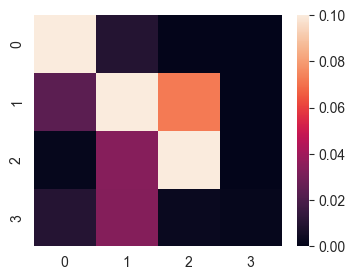

In [13]:
mean_transition = np.mean(transition_matrices, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(mean_transition, vmin=0, vmax=0.1, ax=ax)
plt.show()
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_sampled_timepoints_pre.png', dpi=600)
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_sampled_timepoints_pre.svg', dpi=600)

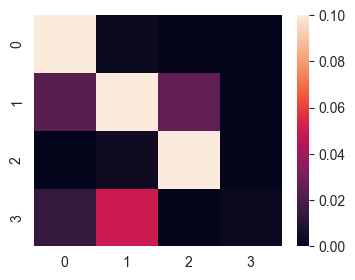

In [14]:
mean_transition_randemb = np.mean(transition_matrices_randemb, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(mean_transition_randemb, vmin=0, vmax=0.1, ax=ax)
plt.show()
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_random_timepoints_pre.png', dpi=600)
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_random_timepoints_pre.svg', dpi=600)

In [15]:
transitions_2 = []
transition_matrices_2 = []
for index_ in refined_indices:
    transitions_2.append(targets_10hz_mode[index_:index_+2])
    transition_matrices_2.append(np.array(transition_matrix(transitions_2[-1].astype(int))))

In [16]:
transitions_randemb_2 = []
transition_matrices_randemb_2 = []
for index_ in random_indices_emb:
    transitions_randemb_2.append(targets_10hz_mode[index_:index_+2])
    transition_matrices_randemb_2.append(np.array(transition_matrix(transitions_randemb_2[-1].astype(int))))

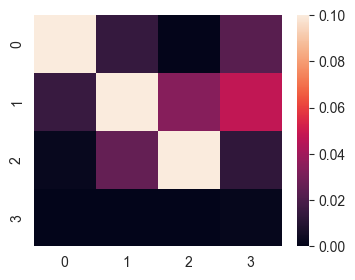

In [17]:
mean_transition_2 = np.mean(transition_matrices_2, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(mean_transition_2, vmin=0, vmax=0.1, ax=ax)
plt.show()
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_sampled_timepoints_post.png', dpi=600)
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_sampled_timepoints_post.svg', dpi=600)

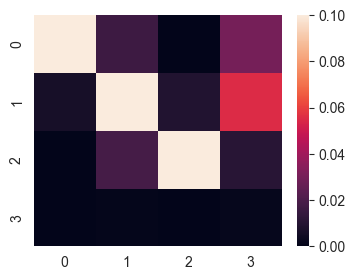

In [18]:
mean_transition_randemb_2 = np.mean(transition_matrices_randemb_2, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.heatmap(mean_transition_randemb_2, vmin=0, vmax=0.1, ax=ax)
plt.show()
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_random_timepoints_post.png', dpi=600)
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_random_timepoints_post.svg', dpi=600)

## quantify

In [19]:
refined_indices_list = []
random_indices_list = []
for cv in tqdm(range(len(X_train_list[-1]))):
    ref_indices = []
    for i in range(X_train_list[-1][cv].shape[0]):
        ref_indices.append(np.where(scaled_features_train == X_train_list[-1][cv][i, :])[0][0])
    refined_indices_list.append(ref_indices)

    total_counts_it = [len(np.where(Y_train_list[-1][cv]==b)[0]) for b in np.unique(Y_train_list[-1][cv])]
    X_samp = []
    for j in range(len(total_counts_it)):
        idx_b = np.where(targets_runlist[cv] == j)[0]
        X_samp.append(features_runlist[cv][idx_b[:total_counts_it[int(j)]]])
    X_samp_ = np.vstack(X_samp)
    rand_indices_emb = []
    for j in range(X_samp_.shape[0]):
        rand_indices_emb.append(np.where(scaled_features_train == X_samp_[j, :])[0][0])
    random_indices_list.append(rand_indices_emb)
    print(np.hstack(refined_indices_list[-1]).shape, np.hstack(random_indices_list[-1]).shape)

  5%|▌         | 1/20 [00:46<14:42, 46.47s/it]

(1997,) (1997,)


 10%|█         | 2/20 [01:32<13:48, 46.05s/it]

(2053,) (2053,)


 15%|█▌        | 3/20 [02:16<12:50, 45.30s/it]

(2005,) (2005,)


 20%|██        | 4/20 [03:03<12:15, 46.00s/it]

(2051,) (2051,)


 25%|██▌       | 5/20 [03:47<11:19, 45.30s/it]

(1981,) (1981,)


 30%|███       | 6/20 [04:31<10:27, 44.80s/it]

(1973,) (1973,)


 35%|███▌      | 7/20 [05:16<09:43, 44.86s/it]

(2014,) (2014,)


 40%|████      | 8/20 [06:02<09:03, 45.31s/it]

(2043,) (2043,)


 45%|████▌     | 9/20 [06:47<08:16, 45.16s/it]

(1992,) (1992,)


 50%|█████     | 10/20 [07:32<07:30, 45.03s/it]

(1993,) (1993,)


 55%|█████▌    | 11/20 [08:18<06:49, 45.47s/it]

(2079,) (2079,)


 60%|██████    | 12/20 [09:03<06:01, 45.16s/it]

(1967,) (1967,)


 65%|██████▌   | 13/20 [09:48<05:16, 45.18s/it]

(2007,) (2007,)


 70%|███████   | 14/20 [10:33<04:30, 45.10s/it]

(2015,) (2015,)


 75%|███████▌  | 15/20 [11:20<03:48, 45.64s/it]

(2025,) (2025,)


 80%|████████  | 16/20 [12:07<03:03, 45.96s/it]

(1983,) (1983,)


 85%|████████▌ | 17/20 [13:02<02:26, 48.69s/it]

(2049,) (2049,)


 90%|█████████ | 18/20 [13:49<01:36, 48.32s/it]

(2066,) (2066,)


 95%|█████████▌| 19/20 [14:34<00:47, 47.40s/it]

(2030,) (2030,)


100%|██████████| 20/20 [15:19<00:00, 45.95s/it]

(1993,) (1993,)


In [20]:
ami_scores = []
ami_scores_rand = []
for ii in tqdm(range(len(refined_indices_list))):
    ami_scores.append([adjusted_mutual_info_score(targets_10hz_mode[np.hstack(refined_indices_list[ii])-1],
                                                  targets_10hz_mode[np.hstack(refined_indices_list[ii])]), 
                       adjusted_mutual_info_score(targets_10hz_mode[np.hstack(refined_indices_list[ii])+1],
                                                  targets_10hz_mode[np.hstack(refined_indices_list[ii])])])
    ami_scores_rand.append([adjusted_mutual_info_score(targets_10hz_mode[np.hstack(random_indices_list[ii])-1],
                                                       targets_10hz_mode[np.hstack(random_indices_list[ii])]), 
                            adjusted_mutual_info_score(targets_10hz_mode[np.hstack(random_indices_list[ii])+1],
                                                       targets_10hz_mode[np.hstack(random_indices_list[ii])])])            
ami_scores, ami_scores_rand          

100%|██████████| 20/20 [00:00<00:00, 47.01it/s]


([[0.5234785097795734, 0.563671588734894],
  [0.5258686248959935, 0.5544580349883151],
  [0.5232698458331111, 0.564797737584041],
  [0.5215606487819509, 0.5667779242852691],
  [0.517643298912601, 0.561236197709056],
  [0.5301565012635898, 0.5625747364098578],
  [0.513991322715902, 0.5709688365441358],
  [0.5232140336188579, 0.5576198325135159],
  [0.5255948102366799, 0.5590970973504396],
  [0.515209723799639, 0.5638706921016221],
  [0.5162487148969831, 0.5614646332935476],
  [0.5243681148354243, 0.5674682593214232],
  [0.53450991178812, 0.5598620249445635],
  [0.5316286309875848, 0.5663234369790617],
  [0.5163217701961201, 0.5545001824177372],
  [0.5284255799242429, 0.5654790286195213],
  [0.5276272606281002, 0.5604140114170227],
  [0.5231166271279672, 0.5641146598735594],
  [0.5215451211103449, 0.5640676400186182],
  [0.5204218964911769, 0.5617204923781477]],
 [[0.6750222965986046, 0.6823586647330462],
  [0.6603713027726625, 0.668629438458744],
  [0.6806043173364875, 0.670863232328947

In [50]:
ami_scores = np.load('../../processed_data/ami_scores.npy')
ami_scores_rand = np.load('../../processed_data/ami_scores_random.npy')

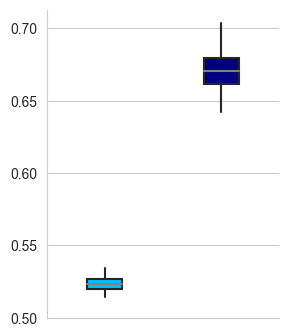

In [21]:
cols = 1
fig, ax = plt.subplots(1, cols, figsize=(3, 4), sharey=True)
sns.boxplot(data = [np.array(ami_scores)[:, 0], np.array(ami_scores_rand)[:, 0]] , saturation=1,
            ax=ax, width=0.3, palette=['deepskyblue', 'navy'], medianprops={"color": "gray"}, 
            linewidth=1.5, showcaps=False)
ax.set_xticklabels('')
ax.set_yticks(np.arange(0.5, 0.75, 0.05))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_transition_amiquant_pre.png', dpi=600)
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_transition_amiquant_pre.svg', dpi=600)

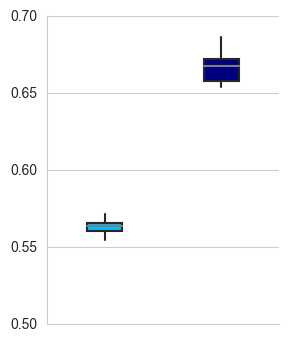

In [22]:
cols = 1
fig, ax = plt.subplots(1, cols, figsize=(3, 4), sharey=True)
sns.boxplot(data = [np.array(ami_scores)[:, 1], np.array(ami_scores_rand)[:, 1]] , saturation=1,
            ax=ax, width=0.3, palette=['deepskyblue', 'navy'], medianprops={"color": "gray"}, 
            linewidth=1.5, showcaps=False)
ax.set_xticklabels('')
ax.set_yticks(np.arange(0.5, 0.75, 0.05))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_transition_amiquant_post.png', dpi=600)
# fig.savefig(r'I:\My Drive\manuscript_figures\asoid\suppfig1\panels\activelearning_transition_amiquant_post.svg', dpi=600)

In [47]:
sample1 = np.array(ami_scores)[:, 0]
sample2 = np.array(ami_scores_rand)[:, 0]
stats.ttest_ind(np.array(ami_scores)[:, 0], np.array(ami_scores_rand)[:, 0], alternative='less')

Ttest_indResult(statistic=-37.14616032645002, pvalue=8.886880533428288e-32)

In [48]:
sample1 = np.array(ami_scores)[:, 1]
sample2 = np.array(ami_scores_rand)[:, 1]
stats.ttest_ind(np.array(ami_scores)[:, 1], np.array(ami_scores_rand)[:, 1], alternative='less')

Ttest_indResult(statistic=-44.421202881744534, pvalue=1.1538660984412657e-34)